In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Importando DataFrame

In [2]:
df = pd.read_csv('./COVID19MEXICO.csv')

# Imprimiendo el nombre de las columnas
column_names = df.columns.tolist()
print(column_names)

C:\Users\zdesp\AppData\Local\Temp\ipykernel_13444\4079459461.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./COVID19MEXICO.csv')


['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI']


In [3]:
# Copia de DataFrame con columnas de interes para frecuencia de días de sobrevivencia
dfdefun = df[['FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'OBESIDAD', 'TABAQUISMO', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL']].copy()

# Convertir fechas en formate datetime para su manipulación
dfdefun['FECHA_SINTOMAS'] = pd.to_datetime(dfdefun['FECHA_SINTOMAS'])

#Convertir valores no validos en 'NaT'
dfdefun['FECHA_DEF'] = pd.to_datetime(dfdefun['FECHA_DEF'], errors = 'coerce')

# Eliminar los valores 'NaT' en la columna DIAS_SOBREVIVENCIA
dfdefun= dfdefun.dropna(subset=['FECHA_DEF'])

dfdefun.head(5)

,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,TABAQUISMO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
15,2022-02-13,2022-02-21,2,54,2,2,2,1,2,2,4,2,97,2
33,2022-03-07,2022-09-10,2,81,1,2,2,2,2,2,2,2,97,7
896,2022-01-01,2022-01-01,2,58,2,2,2,2,2,2,97,1,2,7
926,2022-01-02,2022-01-12,2,61,2,1,2,2,1,2,1,2,97,3
1000,2022-01-01,2022-01-03,2,49,1,2,2,1,2,2,97,1,1,3


* El valor 1 indica que el paciente tiene la condición o enfermedad correspondiente.
* El valor 2 indica que el paciente no tiene la condición o enfermedad correspondiente.
* El valor 3 y 7 indica una clasificación específica para el caso, que puede corresponder a una categoría particular dentro de la clasificación final.
* El valor 97 indica que no se cuenta con información sobre el resultado del laboratorio para el paciente.

##### Agregando a la DataFrame la columna de Días de Sobrevivencia


Obteniendo los días de Sobrevivencia 
$$ Fecha \space Defunción - Fecha \space Sintomas = Días \space Sobrevivencia $$

In [4]:
dfdefun['DIAS_SOBREVIVENCIA'] = (dfdefun['FECHA_DEF'] - dfdefun['FECHA_SINTOMAS']).dt.days

dfdefun.head()

,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,TABAQUISMO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,DIAS_SOBREVIVENCIA
15,2022-02-13,2022-02-21,2,54,2,2,2,1,2,2,4,2,97,2,8
33,2022-03-07,2022-09-10,2,81,1,2,2,2,2,2,2,2,97,7,187
896,2022-01-01,2022-01-01,2,58,2,2,2,2,2,2,97,1,2,7,0
926,2022-01-02,2022-01-12,2,61,2,1,2,2,1,2,1,2,97,3,10
1000,2022-01-01,2022-01-03,2,49,1,2,2,1,2,2,97,1,1,3,2


In [5]:
# Filtrar datos negativos en los días de sobrevivencia
datonegativo = dfdefun.loc[dfdefun['DIAS_SOBREVIVENCIA'] < 0]
datonegativo

,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,TABAQUISMO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,DIAS_SOBREVIVENCIA
1549965,2022-01-26,2022-01-18,2,10,2,2,2,2,2,2,97,1,1,3,-8


Se encontró un dato de un paciente que fallecio antes de presentar sintomas, se procede a limpiar


In [6]:
dfdefun = dfdefun[dfdefun['DIAS_SOBREVIVENCIA'] != -8]
dfdefun.head()

,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,TABAQUISMO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,DIAS_SOBREVIVENCIA
15,2022-02-13,2022-02-21,2,54,2,2,2,1,2,2,4,2,97,2,8
33,2022-03-07,2022-09-10,2,81,1,2,2,2,2,2,2,2,97,7,187
896,2022-01-01,2022-01-01,2,58,2,2,2,2,2,2,97,1,2,7,0
926,2022-01-02,2022-01-12,2,61,2,1,2,2,1,2,1,2,97,3,10
1000,2022-01-01,2022-01-03,2,49,1,2,2,1,2,2,97,1,1,3,2


##### Tabla de Frecuencias que fallecieron respecto a su condición de salud y sus días de supervivencia

In [7]:
# Obtener la tabla de frecuencias de los días de supervivencia
tablaFrecuencias = dfdefun['DIAS_SOBREVIVENCIA'].value_counts().reset_index()
tablaFrecuencias.columns = ['DIAS_SOBREVIVENCIA', 'Frecuencia']

# Ordenar la tabla por los días de supervivencia
tablaFrecuencias = tablaFrecuencias.sort_values('DIAS_SOBREVIVENCIA')

tablaFrecuencias.head()

,DIAS_SOBREVIVENCIA,Frecuencia
18,0,898
9,1,2006
6,2,2555
2,3,3163
0,4,3307


##### Histograma

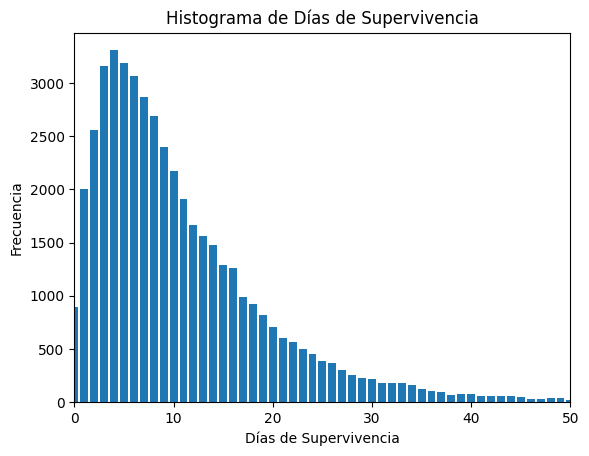

In [8]:
#Obteniendo los datos de la tabla de frecuencias
dias_supervivencia = tablaFrecuencias['DIAS_SOBREVIVENCIA']
frecuencia = tablaFrecuencias['Frecuencia']

plt.bar(dias_supervivencia, frecuencia)

plt.xlabel('Días de Supervivencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Días de Supervivencia')

# Escala en el eje x
plt.xlim(0, 50)


plt.show()

Se puede apreciar que el pico esta a los 5 días de Supervivencia, por lo que se analizará el rango de edades a los que ha sido más afectado 

In [9]:
dfFiltered = dfdefun[(dfdefun['DIAS_SOBREVIVENCIA'] == 5) & (dfdefun['FECHA_DEF'].notnull())]

rangosEdad = {'Menor a 20': (0, 19),
               '20 a 29': (20, 29),
               '30 a 49': (30, 49),
               'Mayor a 50': (50, float('inf'))}


cantidadPersonas = {}
for rango, (min_edad, max_edad) in rangosEdad.items():
    cantidad = len(dfFiltered[(dfFiltered['EDAD'] >= min_edad) & (dfFiltered['EDAD'] < max_edad)])
    cantidadPersonas[rango] = cantidad



In [10]:
tablaResultados = pd.DataFrame.from_dict(cantidadPersonas, orient='index', columns=['Cantidad'])

tablaResultados

,Cantidad
Menor a 20,118
20 a 29,75
30 a 49,348
Mayor a 50,2583


In [11]:
# Filtrando personas mayores a 50 años y con 5 días de supervivencia
dfEnfer = dfdefun[(dfdefun['DIAS_SOBREVIVENCIA'] == 5) & (dfdefun['FECHA_DEF'].notnull()) & (dfdefun['EDAD'] > 50)]

# Contar la cantidad de personas con cada enfermedad
enfermedades = ['DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'OBESIDAD', 'TABAQUISMO']
cantidadPersonas50 = {}
for enfermedad in enfermedades:
    cantidad = len(dfEnfer[dfEnfer[enfermedad] == 1])
    cantidadPersonas50[enfermedad] = cantidad


tablaResultadosEnf = pd.DataFrame.from_dict(cantidadPersonas50, orient='index', columns=['Cantidad'])

tablaResultadosEnf.head(50)

,Cantidad
DIABETES,1011
EPOC,249
ASMA,41
HIPERTENSION,1209
OBESIDAD,263
TABAQUISMO,245


Se tiene que considerar que más de una persona podia tener más de una enfermedad, siendo la Hipertensión la enfermedad más afectada por el virus

##### Esperanza de Vida

Es importante saber la esperanza de vida de las personas que hayna sido intubadas, ya que la mayoria de personas fallecian 

$$ Esperanza = \frac{ \sum Días \space Sobrevivencia \space \cdot \space Frecuencia } {\sum Frcuencia}    $$

In [18]:
dfIntubados = df[['FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'OBESIDAD', 'TABAQUISMO', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL']].copy()

dfIntubados['FECHA_SINTOMAS'] = pd.to_datetime(dfIntubados['FECHA_SINTOMAS'], errors='coerce')
dfIntubados['FECHA_DEF'] = pd.to_datetime(dfIntubados['FECHA_DEF'], errors='coerce')

# Crear la DataFrame dfIntubados con las condiciones especificadas
filtro = (dfIntubados['INTUBADO'] == 1) & (dfIntubados['RESULTADO_ANTIGENO'] == 1) & (dfIntubados['FECHA_DEF'].isnull())
dfIntubados = dfIntubados[filtro]

# Imprimir la tabla de personas intubadas, con resultado de antígeno 1 y no fallecidas
dfIntubados.head()


,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OBESIDAD,TABAQUISMO,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
27441,2022-01-04,NaT,1,1,2,2,2,2,2,2,97,1,1,3
31899,2022-01-03,NaT,1,22,2,2,2,2,2,2,97,1,1,3
47615,2022-01-01,NaT,1,62,2,2,2,2,2,2,1,1,1,3
118585,2022-01-01,NaT,1,38,2,2,2,2,2,2,1,1,1,3
122884,2022-01-01,NaT,1,40,2,2,2,1,2,2,1,1,1,3


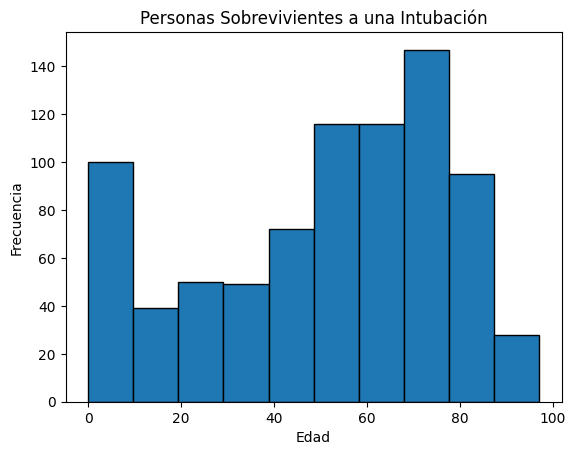

In [21]:
# Histograma del rango de edades en dfIntubados
plt.hist(dfIntubados['EDAD'], bins=10, edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Personas Sobrevivientes a una Intubación')

plt.show()

In [26]:
df_intubadas_fallecidas = dfdefun[(dfdefun['INTUBADO'] == 1) & (dfdefun['FECHA_DEF'].notnull())]

# Calcular la esperanza de vida
esperanza_vida = (tablaFrecuencias['DIAS_SOBREVIVENCIA'] * tablaFrecuencias['Frecuencia']).sum() / tablaFrecuencias['Frecuencia'].sum()

# Imprimir la esperanza de vida
print("La esperanza de vida de las personas intubadas y fallecidas es:", esperanza_vida, "días")


La esperanza de vida de las personas intubadas y fallecidas es: 11.257130067783605 días
